In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
df=pd.read_excel("Ex2.xlsx", sheet_name="Sheet5")

In [3]:
df1=df[["Age","Experience","Induction program cost","Content Satisfaction","Performance Differential","Performance rating","Sourcing Channel","Knowledge level",'Average score']]
df1.head()

,Age,Experience,Induction program cost,Content Satisfaction,Performance Differential,Performance rating,Sourcing Channel,Knowledge level,Average score
0,37,1,800,2,25,3,1,1,2.0
1,48,13,1200,3,15,3,2,1,2.4
2,24,8,900,3,15,3,3,2,2.2
3,56,10,1100,3,30,1,4,1,1.4
4,42,14,600,3,5,3,5,1,2.0


<Axes: >

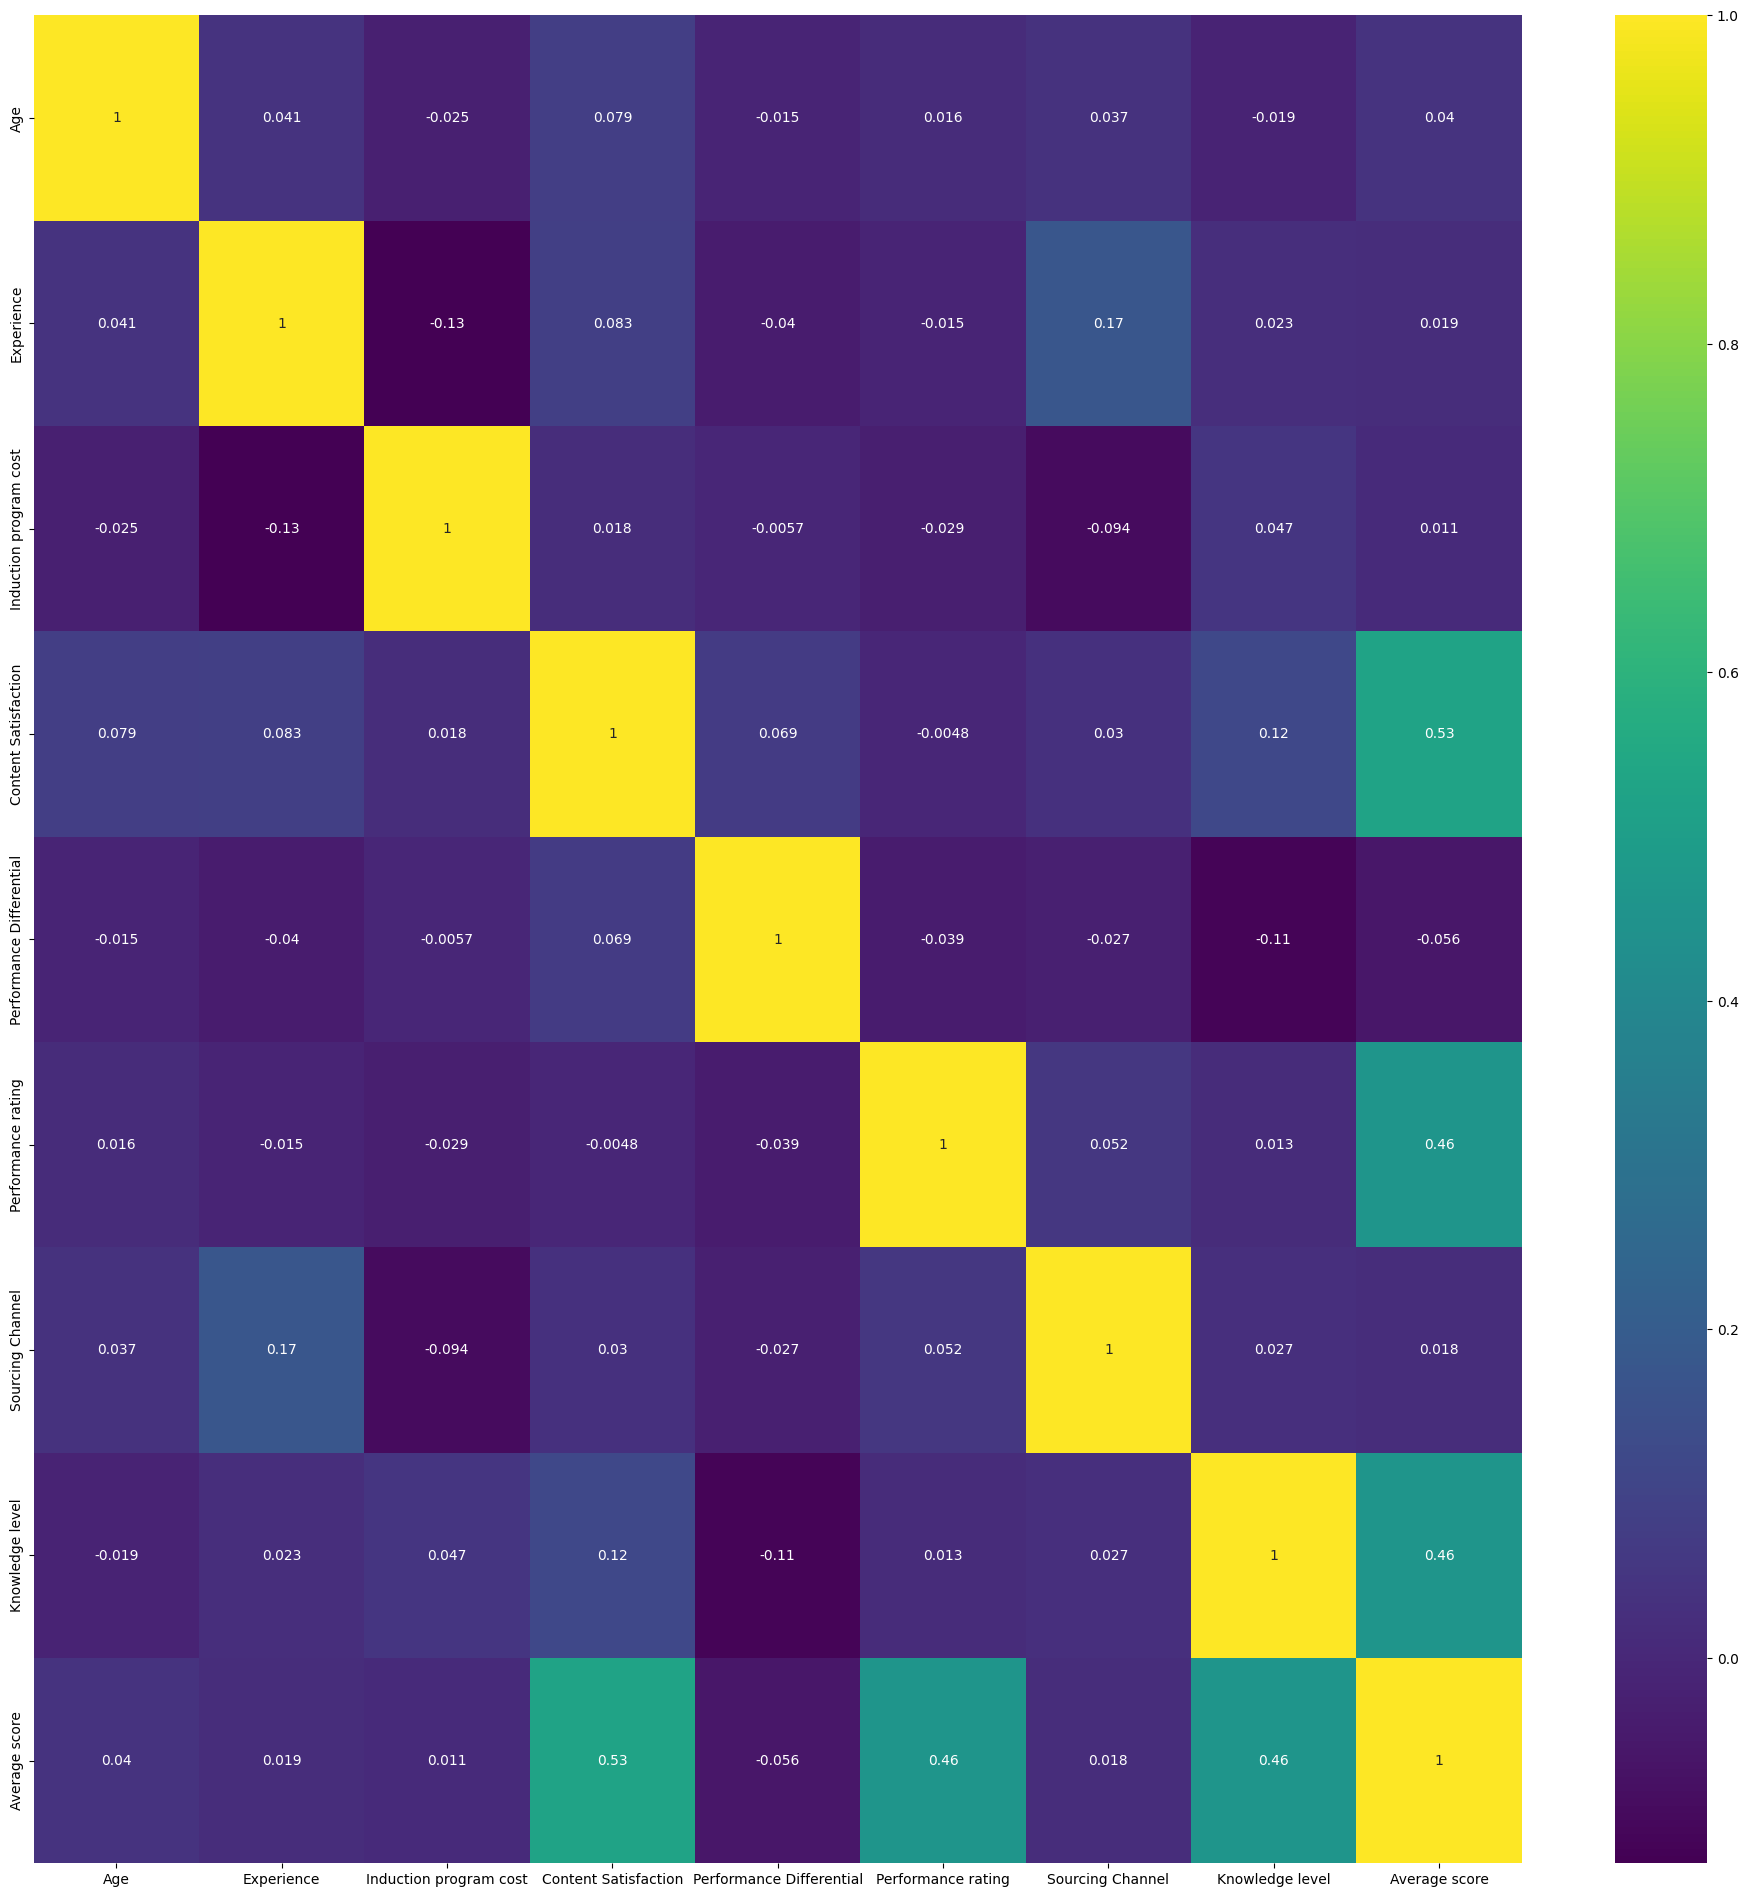

In [4]:
correlation=df1.corr()
plt.figure(figsize=(24,24))
sns.heatmap(correlation,annot=True,cmap='viridis')

Text(0, 0.5, 'Relationship Between colleagues')

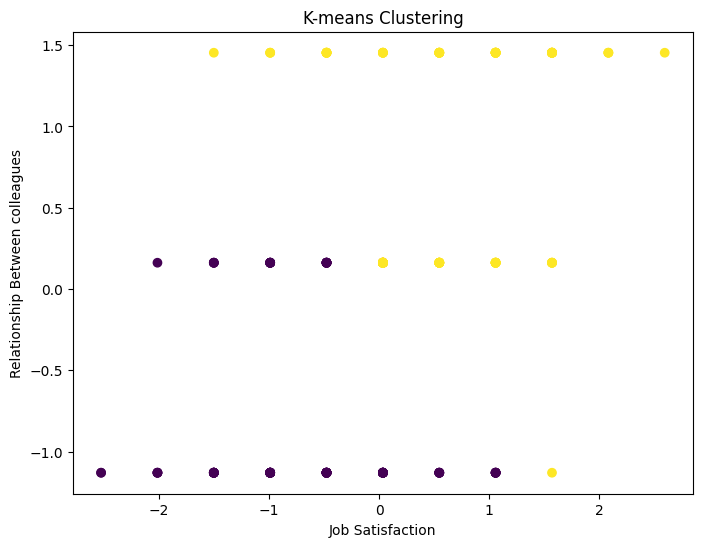

In [5]:
scaler = StandardScaler()
scaled= scaler.fit_transform(df[['Average score','Knowledge level']])

scaled_df = pd.DataFrame(scaled, columns=['Average score','Knowledge level'])
k_opt=2
model = KMeans(n_clusters=k_opt,random_state =42,n_init=20)
model.fit(scaled_df)

scaled_df['labels'] = model.labels_
cluster_centers = model.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(scaled_df['Average score'], scaled_df['Knowledge level'] , c=scaled_df['labels'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Job Satisfaction')
plt.ylabel('Relationship Between colleagues')

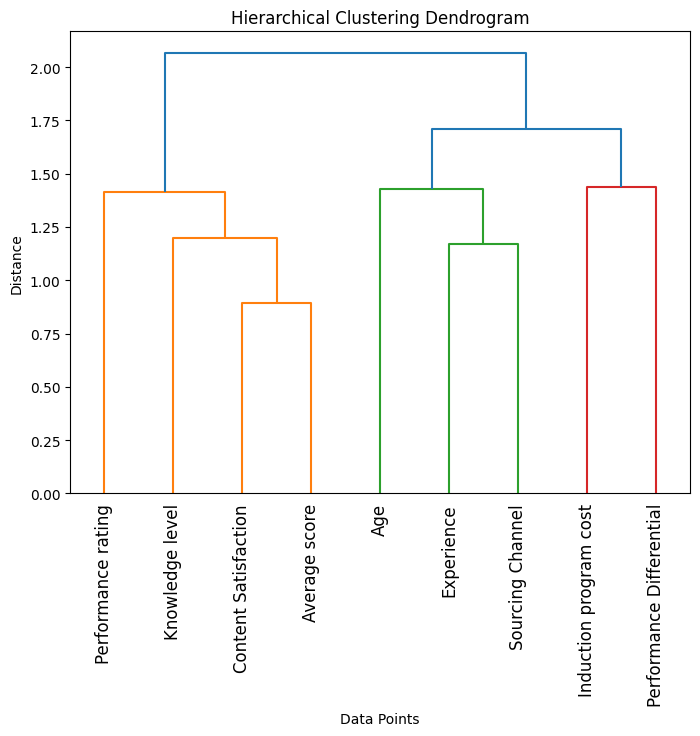

In [6]:
linkage_matrix = linkage(correlation, method='ward')

# Plot the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix, labels=correlation.index, orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.xticks(rotation=90)
plt.ylabel('Distance')
plt.show()